In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches

In [18]:
class Rectangle:
    def __init__(self, width, height, x=None, y=None):
        self.width = width
        self.height = height
        self.area = width*height
        self.x = x
        self.y = y
        
    def fits_within(self, rectangle):
        return (self.width <= rectangle.width and self.height <= rectangle.height)
        
    def __lt__(self, other):
        return self.area < other.area
    
    def __str__(self):
        return "Coordinates: ({}, {})\tShape: ({}, {})\t Area:{}".format(self.x, self.y, self.width, self.height, self.area)

In [52]:
class SP_solver:
    def __init__(self):
        self.rectangles_list = []
        self.frequencies_list = []
        self.width = 0
        self.height = 0
        self.used_area = 0
        self.solution = []
        self.animation = None
        
    def solve(self, width, rectangles_list, frequencies_list):
        self.rectangles_list = sorted(rectangles_list, reverse=True)
        self.frequencies_list = frequencies_list
        self.width = width
        strip = Rectangle(width, np.inf, 0, 0)
        self.packing(strip)
        return self.solution
    
    def solve(self, width, rectangles_list, frequencies_list):
        self.rectangles_list = sorted(rectangles_list, reverse=True)
        self.frequencies_list = frequencies_list
        self.width = width
        strip = Rectangle(width, np.inf, 0, 0)
        self.packing(strip)
        return self.solution
    
        
    def recursive_packing(self, S2):
        valid_rectangle_position = None
        
        #Comprobamos si algun rectángulo entra en S2
        for i, r in enumerate(self.rectangles_list):
            if r.fits_within(S2) and frequencies_list[i]:
                valid_rectangle_position = i
                break
                
#         valid_rectangle_position = self.fits(S2)


        #Si ninguno entra, salimos
        if valid_rectangle_position == None:
            return
        
        #Si entra algun rectángulo
        else:
            #Colocamos en S2 el primer rectangulo que encontremos en la lista y devolvemos los subespacios acotados S3 y S4.
            S3, S4 = self.pack(S2, valid_rectangle_position)

            #Llamamos recursivamente a la funcion recursive_packing con el rectangulo de mayor área.
            if S3.area > S4.area:
                self.recursive_packing(S3)

                #Comprobamos que S4 no tiene área cero.
                if(S4.area > 0):
                    self.recursive_packing(S4)
            else:
                self.recursive_packing(S4)

                #Comprobamos que S3 no tiene área cero.
                if(S3.area > 0):
                    self.recursive_packing(S3)

#     def fits(self, rectangle):
#         for i, r in enumerate(self.rectangles_list):
#             if r.width <= rectangle.width and r.height <= rectangle.height and frequencies_list[i] > 0:
#                 return i
            
    def pack(self, S2, valid_rectangle_position):
        # Tomamos el primer rectángulo que entra en S2
        R = self.rectangles_list[valid_rectangle_position]

        # Calculamos los subespacios acotados S3 y S4 que quedan tras colocar S3
        S3 = Rectangle(        R.width     , S2.height - R.height,      S2.x      , S2.y + R.height )
        S4 = Rectangle( S2.width - R.width ,       S2.height     , S2.x + R.width ,      S2.y       )

        # Añadimos el rectángulo colocado a la solución y lo eliminamos de la lista de frecuencias.
        self.solution.append(Rectangle(R.width, R.height, S2.x, S2.y))
        self.frequencies_list[valid_rectangle_position] -= 1

        return S3, S4
    
    def packing(self, S):
        self.height = 0

        # Mientras haya un rectángulo no colocado.
        while np.any(self.frequencies_list):
            # Buscamos el primero que no halla sido posicionado.
            pos = self.first_non_zero(frequencies_list)
            # Lo colocamos en el espacio no acotado S y obtenemos los subespacios restantes S1 y S2.
            S1, S2 = self.pack_unbounded(S, pos)
            self.height += self.rectangles_list[pos].height

            # Actualizamos S con el valor S1 de rectángulo no acotado.
            S = S1

            # Llamamos a la función de coloca rectangulos en espacios acotados.
            self.recursive_packing(S2)

#         return self.height
    
    def pack_unbounded(self, S, rectangle_to_pack_position):
        # Tomamos el rectángulo a colocar
        R = self.rectangles_list[rectangle_to_pack_position]

        # Calculamos el subespacio **NO** acotado S1 y el subespacio acotado S2 restantes.
        S1 = Rectangle(        S.width    ,   np.inf  ,      S.x      , S.y + R.height )
        S2 = Rectangle( S.width - R.width , R.height  , S.x + R.width ,      S.y       )

        # Añadimos el rectángulo colocado a la solución y lo eliminamos de la lista de frecuencias.
        self.solution.append(Rectangle(R.width, R.height, S.x, S.y))
        self.frequencies_list[rectangle_to_pack_position] -= 1

        return S1, S2
    
    def first_non_zero(self, l):
        for i, item in enumerate(l):
            if(item > 0):
                return i
            
    def plot_animation(self):
        if not self.solution:
            return
        
        fig, ax = plt.subplots(figsize=(5,5))
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])

        self.animation = animation.FuncAnimation(fig, self.update_animation, frames=len(self.solution), interval=200, \
                                                               repeat_delay=5000)
        plt.show()
        
    def update_animation(self, i):
        x = self.solution[i].x
        y = self.solution[i].y
        w = self.solution[i].width
        h = self.solution[i].height

        r = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='r', fill=True)

        ax = plt.gca()
        ax.add_patch(r)
        rx, ry = r.get_xy()
        cx = rx + r.get_width()/2.0
        cy = ry + r.get_height()/2.0
#         ax.annotate('A', (cx, cy), color='w', weight='bold', fontsize=6, ha='center', va='center'

In [53]:
dimensions = [(1,2), (2,2), (1,1), (3,2)]
frequencies_list = [5, 10, 10, 15]

# Creamos la lista de objetos rectángulo.
rectangles_list = [Rectangle(p[0], p[1]) for p in dimensions]

solver = SP_solver()
solution = solver.solve(10, rectangles_list, frequencies_list)
output = solution

# for r in solution:
#     print(r)

# for r in solver.rectangles_list:
#     print(r)



<IPython.core.display.Javascript object>


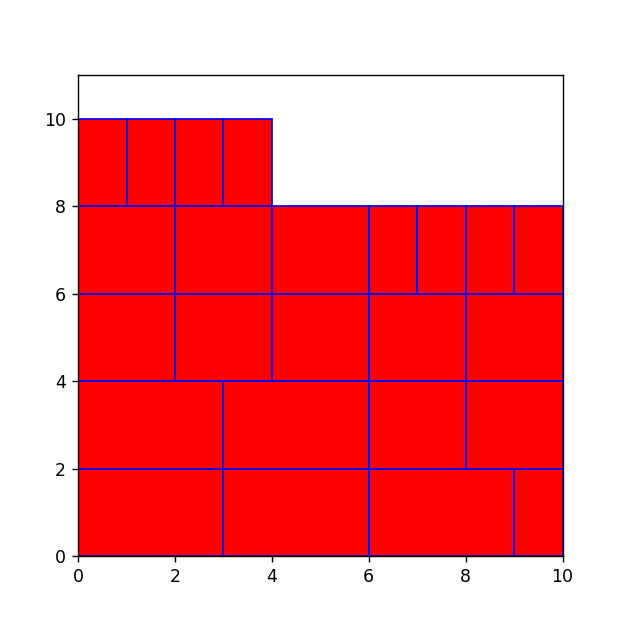

In [54]:
anim = solver.plot_animation()

<IPython.core.display.Javascript object>


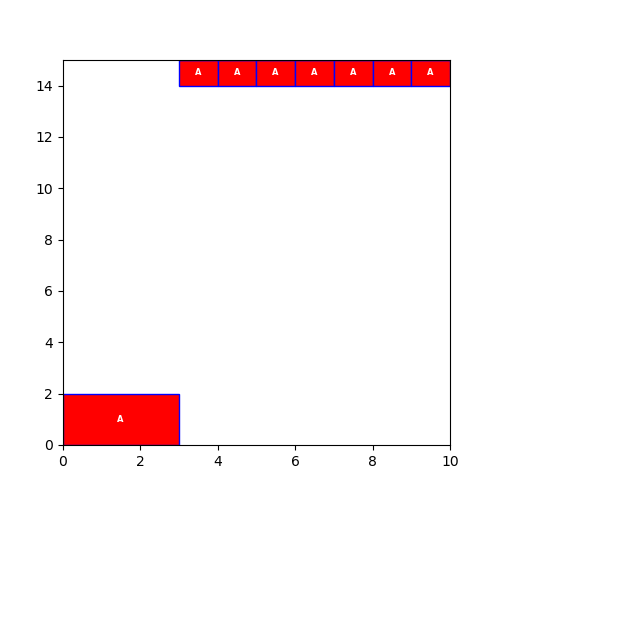

NameError: name 'matplotlib' is not defined

In [23]:
width = 10
height = 15

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim([0, width])
ax.set_ylim([0, height])

def animate(i):
    x = output[i].x
    y = output[i].y
    w = output[i].width
    h = output[i].height

    r = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='r', fill=True)

    ax.add_patch(r)
    rx, ry = r.get_xy()
    cx = rx + r.get_width()/2.0
    cy = ry + r.get_height()/2.0
    ax.annotate('A', (cx, cy), color='w', weight='bold', fontsize=6, ha='center', va='center')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(output), interval=200)